# GPT2

In [ ]:
!pip install datasets

from datasets import load_dataset

dataset = load_dataset("tweet_eval", "sentiment")
display(dataset['train'].to_pandas().head())

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [ ]:
import pandas as pd

# Convert splits to pandas DataFrames
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()
validation_df = dataset['validation'].to_pandas()

# Merge the DataFrames
merged_df = pd.concat([train_df, test_df, validation_df])

# Display the first few rows of the merged DataFrame
display(merged_df.head())

# Display the shape of the merged DataFrame
print(f"Shape of the merged DataFrame: {merged_df.shape}")

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


Shape of the merged DataFrame: (59899, 2)


In [ ]:
# Check for missing values
print("Missing values before cleaning:")
print(merged_df.isnull().sum())

# Since there are no missing values, we can skip handling them for this dataset.

Missing values before cleaning:
text     0
label    0
dtype: int64


In [ ]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove mentions (@user) and URLs (http/https)
    text = re.sub(r'(@\w+|http\S+)', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

merged_df['cleaned_text'] = merged_df['text'].apply(clean_text)

display(merged_df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"""QT @user In the original draft of the 7th boo...",qt in the original draft of the 7th book remus...
1,"""Ben Smith / Smith (concussion) remains out of...",ben smith smith concussion remains out of the ...
2,Sorry bout the stream last night I crashed out...,sorry bout the stream last night i crashed out...
3,Chase Headley's RBI double in the 8th inning o...,chase headleys rbi double in the 8th inning of...
4,@user Alciato: Bee will invest 150 million in ...,alciato bee will invest 150 million in january...


In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import GPT2Tokenizer

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

def tokenize_for_gpt2(text):
    # Tokenize the text using the GPT-2 tokenizer
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return tokens

merged_df['gpt2_tokens'] = merged_df['cleaned_text'].apply(tokenize_for_gpt2)

display(merged_df[['cleaned_text', 'gpt2_tokens']].head())

,cleaned_text,gpt2_tokens
0,qt in the original draft of the 7th book remus...,"[39568, 287, 262, 2656, 4538, 286, 262, 767, 4..."
1,ben smith smith concussion remains out of the ...,"[11722, 895, 342, 895, 342, 27502, 3793, 503, ..."
2,sorry bout the stream last night i crashed out...,"[41599, 18222, 262, 4269, 938, 1755, 1312, 149..."
3,chase headleys rbi double in the 8th inning of...,"[354, 589, 1182, 21325, 374, 8482, 4274, 287, ..."
4,alciato bee will invest 150 million in january...,"[282, 979, 5549, 20697, 481, 1325, 6640, 1510,..."


In [ ]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


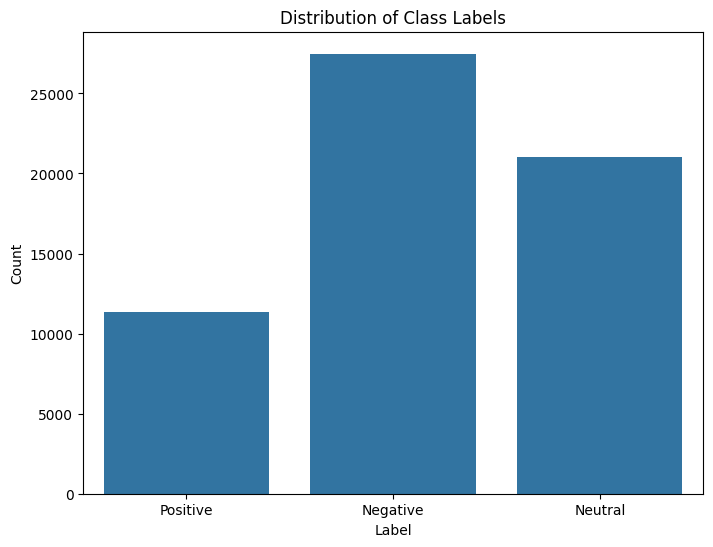

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'label' column
label_counts = merged_df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Class Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=label_counts.index, labels=['Negative', 'Neutral', 'Positive'])
plt.show()

In [ ]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [ ]:
from sklearn.model_selection import train_test_split

# Filter for positive sentiment samples (label == 2)
positive_df = merged_df[merged_df['label'] == 2].copy()

# Split the positive_df into training and testing sets
train_positive_df, test_positive_df = train_test_split(positive_df, test_size=0.2, random_state=42)

# Format the text with a prefix indicating positive sentiment for the training set
train_positive_df['formatted_text'] = '[Positive] ' + train_positive_df['cleaned_text']

# Display the first few formatted samples from the training set
display(train_positive_df[['cleaned_text', 'formatted_text']].head())

print(f"Shape of original positive_df: {positive_df.shape}")
print(f"Shape of train_positive_df: {train_positive_df.shape}")
print(f"Shape of test_positive_df: {test_positive_df.shape}")

,cleaned_text,formatted_text
9576,neymar shockingly starts playing for brazil li...,[Positive] neymar shockingly starts playing fo...
38409,sale mary green silk just married boyshort rev...,[Positive] sale mary green silk just married b...
10366,nothing like a rainy sunday with coffee seinfe...,[Positive] nothing like a rainy sunday with co...
11147,oracle just sneak into lead from the leeward s...,[Positive] oracle just sneak into lead from th...
29752,you need to come to the houston rodeo in march,[Positive] you need to come to the houston rod...


Shape of original positive_df: (21043, 4)
Shape of train_positive_df: (16834, 5)
Shape of test_positive_df: (4209, 4)


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['formatted_text'], padding="max_length", truncation=True, max_length=128)

# Add 'formatted_text' column to both train and test dataframes
train_positive_df['formatted_text'] = '[Positive] ' + train_positive_df['cleaned_text']
test_positive_df['formatted_text'] = '[Positive] ' + test_positive_df['cleaned_text']


# Tokenize the training and testing sets
tokenized_train_dataset = train_positive_df.copy()
tokenized_train_dataset['input_ids'] = tokenized_train_dataset.apply(lambda x: tokenize_function({'formatted_text': x['formatted_text']})['input_ids'], axis=1)
tokenized_train_dataset['attention_mask'] = tokenized_train_dataset.apply(lambda x: tokenize_function({'formatted_text': x['formatted_text']})['attention_mask'], axis=1)


tokenized_test_dataset = test_positive_df.copy()
tokenized_test_dataset['input_ids'] = tokenized_test_dataset.apply(lambda x: tokenize_function({'formatted_text': x['formatted_text']})['input_ids'], axis=1)
tokenized_test_dataset['attention_mask'] = tokenized_test_dataset.apply(lambda x: tokenize_function({'formatted_text': x['formatted_text']})['attention_mask'], axis=1)

print("Tokenization complete for training and testing sets.")

Tokenization complete for training and testing sets.


## Implement Hyperparameter Search

### Subtask:
Implement hyperparameter search using Optuna for epoch and learning rate, define training arguments, and use mixed precision.

**Reasoning**:
Use Optuna to search for the best epoch and learning rate, define the `TrainingArguments` with mixed precision enabled, and set up the `Trainer` for hyperparameter tuning.

In [ ]:
!pip install optuna

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments, AutoModelForCausalLM, AutoTokenizer
import torch
from torch.utils.data import Dataset

# Assuming 'train_positive_df' is already created and cleaned with 'cleaned_text' and 'formatted_text' columns
# Assuming 'tokenizer' and 'model' (DistilGPT-2) are already loaded and tokenizer.pad_token is set

# Create a PyTorch Dataset from the tokenized training data
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        item = self.tokenizer(self.dataframe.iloc[idx]['formatted_text'],
                              padding="max_length",
                              truncation=True,
                              max_length=128,
                              return_tensors="pt")
        # Language modeling requires labels to be the input_ids
        item['labels'] = item['input_ids'].clone()
        return {key: val.squeeze() for key, val in item.items()} # Squeeze to remove batch dimension


train_dataset = SentimentDataset(train_positive_df, tokenizer)
test_dataset = SentimentDataset(test_positive_df, tokenizer) # Create test dataset


# Define the model_init function for Optuna
def model_init(trial):
    # Load the pretrained DistilGPT-2 model for causal language modeling
    model = AutoModelForCausalLM.from_pretrained("distilgpt2")
    # Set the padding token for the model
    model.config.pad_token_id = model.config.eos_token_id
    return model

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 3)

    # Define training arguments with suggested hyperparameters and mixed precision
    training_args = TrainingArguments(
        output_dir='./results',          # output directory for checkpoints
        num_train_epochs=num_train_epochs,              # number of training epochs
        per_device_train_batch_size=8,   # batch size per device during training
        save_steps=1000,                 # number of updates steps before checkpointing
        save_total_limit=2,              # limit the total number of checkpoints to save
        logging_dir='./logs',            # directory for storing logs
        logging_steps=100,               # number of update steps before logging
        learning_rate=learning_rate,      # learning rate from Optuna trial
        weight_decay=0.01,               # weight decay
        eval_strategy='epoch',           # Evaluate after each epoch
        save_strategy='epoch',           # Save after each epoch to match eval_strategy
        load_best_model_at_end=True,     # Load the best model based on evaluation metric
        metric_for_best_model='eval_loss', # Metric to monitor for best model
        report_to="none", # Disable reporting to Weights & Biases
        fp16=True # Enable mixed precision training
    )

    # Instantiate the Trainer object
    trainer = Trainer(
        model_init=model_init, # Use model_init for hyperparameter search
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset, # Include test dataset for evaluation
    )

    # Train the model
    trainer.train()

    # Evaluate the model on the test set and return the metric to optimize
    eval_result = trainer.evaluate()
    return eval_result["eval_loss"] # Return the evaluation loss for minimization


# Create an Optuna study and optimize the objective function
# We aim to minimize the evaluation loss
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5) # Set n_trials to 1 as requested

# Print the best trial's parameters
print("Best trial:")
print("  Value (Evaluation Loss): {}".format(study.best_trial.value))
print("  Params: ")
for key, value in study.best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-09-24 23:14:58,390] A new study created in memory with name: no-name-f4e730f3-3ab8-4db0-aefe-d1acc39ec2e7


Epoch,Training Loss,Validation Loss
1,0.891500,0.894042
2,0.851700,0.884899


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


[I 2025-09-24 23:24:13,927] Trial 0 finished with value: 0.884899377822876 and parameters: {'learning_rate': 2.2763699251894928e-05, 'num_train_epochs': 2}. Best is trial 0 with value: 0.884899377822876.


Epoch,Training Loss,Validation Loss
1,0.888100,0.891089
2,0.847200,0.882032


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


[I 2025-09-24 23:34:08,022] Trial 1 finished with value: 0.8820319771766663 and parameters: {'learning_rate': 2.5005608656219784e-05, 'num_train_epochs': 2}. Best is trial 1 with value: 0.8820319771766663.


Epoch,Training Loss,Validation Loss
1,0.905400,0.905863
2,0.862400,0.890378
3,0.843400,0.886850


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


[I 2025-09-24 23:48:15,534] Trial 2 finished with value: 0.8868496417999268 and parameters: {'learning_rate': 1.4516771220396764e-05, 'num_train_epochs': 3}. Best is trial 1 with value: 0.8820319771766663.


Epoch,Training Loss,Validation Loss
1,0.889100,0.893506


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


[I 2025-09-24 23:53:29,540] Trial 3 finished with value: 0.8935064077377319 and parameters: {'learning_rate': 3.5071022498165464e-05, 'num_train_epochs': 1}. Best is trial 1 with value: 0.8820319771766663.


Epoch,Training Loss,Validation Loss
1,0.911800,0.912535


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


[I 2025-09-24 23:58:47,722] Trial 4 finished with value: 0.9125351905822754 and parameters: {'learning_rate': 2.0197801692364275e-05, 'num_train_epochs': 1}. Best is trial 1 with value: 0.8820319771766663.


Best trial:
  Value (Evaluation Loss): 0.8820319771766663
  Params: 
    learning_rate: 2.5005608656219784e-05
    num_train_epochs: 2


## Train the model with best hyperparameters

### Subtask:
Train the model using the best hyperparameters found by Optuna.

**Reasoning**:
Instantiate the `TrainingArguments` with the best hyperparameters from the Optuna study, instantiate the `Trainer` object with the best model and training arguments, and then start the training process.

In [ ]:
# Get the best hyperparameters from the Optuna study
best_params = study.best_trial.params

# Define training arguments with the best hyperparameters
training_args = TrainingArguments(
    output_dir='./results',          # output directory for checkpoints
    num_train_epochs= 5, # Use best number of epochs
    per_device_train_batch_size=8,   # batch size per device during training
    save_steps=1000,                 # number of updates steps before checkpointing
    save_total_limit=2,              # limit the total number of checkpoints to save
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # number of update steps before logging
    learning_rate=best_params['learning_rate'], # Use best learning rate
    weight_decay=0.01,               # weight decay
    eval_strategy='epoch',           # Evaluate after each epoch
    save_strategy='epoch',           # Save after each epoch to match eval_strategy
    load_best_model_at_end=True,     # Load the best model based on evaluation metric
    metric_for_best_model='eval_loss', # Metric to monitor for best model
    report_to="none", # Disable reporting to Weights & Biases
    fp16=True # Enable mixed precision training
)

# Load the best model found during hyperparameter search
best_model = AutoModelForCausalLM.from_pretrained("distilgpt2")
best_model.config.pad_token_id = best_model.config.eos_token_id


# Instantiate the Trainer object with the best model and training arguments
trainer = Trainer(
    model=best_model, # Use the best model
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Start the training process
trainer.train()

print("Model training with best hyperparameters complete.")

Epoch,Training Loss,Validation Loss
1,0.882900,0.886395
2,0.833200,0.869747
3,0.803400,0.864052
4,0.807500,0.862092
5,0.792500,0.861691


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Model training with best hyperparameters complete.


## Save the fine-tuned model

### Subtask:
Save the fine-tuned model and tokenizer to the specified local path.

**Reasoning**:
Save the fine-tuned model and tokenizer to the local path using the `trainer.save_model()` and `tokenizer.save_pretrained()` methods.

In [ ]:
import os

# Define the local path to save the model
save_path_local = "C:\\Users\\adria\\OneDrive\\Desktop\\CODING\\jupyter\\models\\tweeteval\\gpt2"

# Create the directory if it doesn't exist
os.makedirs(save_path_local, exist_ok=True)

# Save the model and tokenizer
trainer.save_model(save_path_local)
tokenizer.save_pretrained(save_path_local)

print(f"Model and tokenizer saved to {save_path_local}")

Model and tokenizer saved to C:\Users\adria\OneDrive\Desktop\CODING\jupyter\models\tweeteval\gpt2


# Dataset augmentation


## Generate sample sentences

### Subtask:
Load the fine-tuned model and generate sample sentences.

## Filter minority classes

### Subtask:
Create dataframes for the negative (label 0) and positive (label 2) sentiment tweets.

**Reasoning**:
Filter the merged_df to create separate dataframes for negative and positive sentiment and display the first few rows of each.

In [ ]:
# Create a new DataFrame called negative_df by filtering the merged_df DataFrame to include only rows where the 'label' column is equal to 0.
negative_df = merged_df[merged_df['label'] == 0].copy()

# Create a new DataFrame called positive_df by filtering the merged_df DataFrame to include only rows where the 'label' column is equal to 2.
positive_df = merged_df[merged_df['label'] == 2].copy()

# Display the first 5 rows of both negative_df and positive_df to verify the filtering was successful.
print("First 5 rows of negative_df:")
display(negative_df.head())

print("\nFirst 5 rows of positive_df:")
display(positive_df.head())

First 5 rows of negative_df:


,text,label
7,So disappointed in wwe summerslam! I want to s...,0
13,That sucks if you have to take the SATs tomorrow,0
18,Amy Schumer sat down with The Hollywood Report...,0
42,@user how the hell does every one else get to ...,0
50,Thanks manager for putting me on the schedule ...,0



First 5 rows of positive_df:


,text,label
0,"""QT @user In the original draft of the 7th boo...",2
4,@user Alciato: Bee will invest 150 million in ...,2
5,@user LIT MY MUM 'Kerry the louboutins I wonde...,2
6,"""\"""""""" SOUL TRAIN\"""""""" OCT 27 HALLOWEEN SPECIA...",2
8,"""This is the last Sunday w/o football .....,NF...",2


## Generate text for minority classes

### Subtask:
Use the fine-tuned model to generate new text based on the existing samples from the negative and positive classes.

**Reasoning**:
Define a function to generate text for minority classes and call it for negative and positive dataframes.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm # Import tqdm
import re # Import re
import pandas as pd # Import pandas

# Define the clean_text function again as it might not be in the current scope
def clean_text(text):
    # Check if the input is a string before applying string methods
    if not isinstance(text, str):
        return "" # Return an empty string for non-string inputs (like NaN)

    # Convert to lowercase
    text = text.lower()
    # Remove mentions (@user) and URLs (http/https)
    text = re.sub(r'(@\w+|http\S+)', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def generate_text(dataframe, num_samples_to_generate):
    generated_texts = []
    # Use the loaded_tokenizer and loaded_model which were loaded in the previous cell
    # device was also set in the previous cell

    # Apply the clean_text function to the dataframe to ensure 'cleaned_text' exists
    if 'cleaned_text' not in dataframe.columns:
        dataframe['cleaned_text'] = dataframe['text'].apply(clean_text)


    # Only generate if num_samples_to_generate is positive
    if num_samples_to_generate > 0:
        # Take a random sample of the specified number of samples from the dataframe
        # Use replace=True to allow sampling with replacement if num_samples_to_generate > len(dataframe)
        sampled_df = dataframe.sample(n=num_samples_to_generate, replace=True, random_state=42)


        # Use tqdm to show progress
        for index, row in tqdm(sampled_df.iterrows(), total=len(sampled_df), desc="Generating text"):
            # Format the text based on the label
            prefix = "[Negative] " if row['label'] == 0 else "[Positive] "
            prompt_text = prefix + row['cleaned_text']

            # Encode the prompt
            input_ids = loaded_tokenizer.encode(prompt_text, return_tensors="pt").to(device)

            # Generate text
            output = loaded_model.generate(
                input_ids,
                max_length=100,  # Increased max_length for potentially longer responses
                num_return_sequences=1, # Generate one sequence per prompt
                no_repeat_ngram_size=2,
                do_sample=True,
                top_k=50,
                top_p=0.95,
                temperature=0.8, # Increased temperature for more diversity
                pad_token_id=loaded_tokenizer.eos_token_id
            )

            # Decode and store the generated text
            for sample_output in output:
                decoded_text = loaded_tokenizer.decode(sample_output, skip_special_tokens=True)
                # Remove the prompt from the generated text
                generated_text = decoded_text.replace(prompt_text, "").strip()
                generated_texts.append({'text': generated_text, 'label': row['label']})

            # Print progress every 100 samples
            if (index + 1) % 100 == 0:
                print(f"Generated {len(generated_texts)} samples so far.")

    return generated_texts

# Determine the number of samples to generate for each minority class to match the majority class count (label 1 - Neutral)
majority_class_count = merged_df['label'].value_counts().max()
negative_class_count = merged_df['label'].value_counts()[0]
positive_class_count = merged_df['label'].value_counts()[2]

num_generate_negative = majority_class_count - negative_class_count
num_generate_positive = majority_class_count - positive_class_count

print(f"Target number of samples for each minority class: {majority_class_count}")
print(f"Number of negative samples to generate: {num_generate_negative}")
print(f"Number of positive samples to generate: {num_generate_positive}")

# Generate new texts for negative and positive classes
# Ensure negative_df and positive_df are defined before calling generate_text
# Filter minority classes again just in case
negative_df = merged_df[merged_df['label'] == 0].copy()
positive_df = merged_df[merged_df['label'] == 2].copy()


generated_negative_texts = generate_text(negative_df, num_generate_negative)
generated_positive_texts = generate_text(positive_df, num_generate_positive)

print(f"Generated {len(generated_negative_texts)} negative samples.")
print(f"Generated {len(generated_positive_texts)} positive samples.")

Target number of samples for each minority class: 27479
Number of negative samples to generate: 16102
Number of positive samples to generate: 6436


Generating text:   0%|          | 0/16102 [00:00<?, ?it/s]

Generated 3 samples so far.
Generated 26 samples so far.
Generated 167 samples so far.
Generated 184 samples so far.
Generated 396 samples so far.
Generated 845 samples so far.
Generated 875 samples so far.
Generated 1045 samples so far.
Generated 1137 samples so far.
Generated 1183 samples so far.
Generated 1243 samples so far.
Generated 1262 samples so far.
Generated 1282 samples so far.
Generated 1338 samples so far.
Generated 1347 samples so far.
Generated 1383 samples so far.
Generated 1506 samples so far.
Generated 1617 samples so far.
Generated 1760 samples so far.
Generated 1864 samples so far.
Generated 2089 samples so far.
Generated 2191 samples so far.
Generated 2369 samples so far.
Generated 2383 samples so far.
Generated 2463 samples so far.
Generated 2683 samples so far.
Generated 2707 samples so far.
Generated 3173 samples so far.
Generated 3468 samples so far.
Generated 3810 samples so far.
Generated 3880 samples so far.
Generated 3992 samples so far.
Generated 4095 sam

Generating text:   0%|          | 0/6436 [00:00<?, ?it/s]

Generated 143 samples so far.
Generated 184 samples so far.
Generated 264 samples so far.
Generated 368 samples so far.
Generated 452 samples so far.
Generated 558 samples so far.
Generated 721 samples so far.
Generated 776 samples so far.
Generated 863 samples so far.
Generated 870 samples so far.
Generated 1026 samples so far.
Generated 1028 samples so far.
Generated 1067 samples so far.
Generated 1085 samples so far.
Generated 1346 samples so far.
Generated 1622 samples so far.
Generated 1669 samples so far.
Generated 1752 samples so far.
Generated 2078 samples so far.
Generated 2246 samples so far.
Generated 2376 samples so far.
Generated 2413 samples so far.
Generated 2457 samples so far.
Generated 2491 samples so far.
Generated 2576 samples so far.
Generated 2660 samples so far.
Generated 2705 samples so far.
Generated 2713 samples so far.
Generated 2745 samples so far.
Generated 3069 samples so far.
Generated 3092 samples so far.
Generated 3153 samples so far.
Generated 3168 sam

## Combine generated text

### Subtask:
Combine the generated text with their corresponding labels.

**Reasoning**:
Create a new DataFrame from the generated negative and positive texts and their labels and display the head of the new DataFrame.

In [ ]:
import pandas as pd

# Combine the generated texts and their labels into a single list
all_generated_texts = generated_negative_texts + generated_positive_texts

# Create a DataFrame from the generated texts and labels
generated_df = pd.DataFrame(all_generated_texts)

# Display the first few rows of the generated DataFrame
display(generated_df.head())

# Display the shape of the generated DataFrame
print(f"Shape of the generated DataFrame: {generated_df.shape}")

,text,label
0,than the law,0
1,,0
2,,0
3,for a,0
4,,0


Shape of the generated DataFrame: (22538, 2)


## Create augmented dataset

### Subtask:
Merge the generated data with the original dataset to create an augmented dataset.

**Reasoning**:
Concatenate the original `merged_df` with the `generated_df` to create the final augmented dataset and display the head and shape of the augmented dataset.

In [ ]:
# Concatenate the original dataframe with the generated dataframe
augmented_df = pd.concat([merged_df[['text', 'label']], generated_df])

# Display the first few rows of the augmented DataFrame
display(augmented_df.head())

# Display the shape of the augmented DataFrame
print(f"Shape of the augmented DataFrame: {augmented_df.shape}")

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


Shape of the augmented DataFrame: (82437, 2)


## Save augmented dataset

### Subtask:
Save the augmented dataset to the specified local path.

**Reasoning**:
Save the `augmented_df` DataFrame to a CSV file in the specified local directory.

In [ ]:
# Define the local directory to save the dataset
save_directory_local = "C:\\Users\\adria\\OneDrive\\Desktop\\CODING\\jupyter\\datasets\\tweeteval"

# Create the directory if it doesn't exist
import os
os.makedirs(save_directory_local, exist_ok=True)

# Define the full path for the augmented dataset file
augmented_dataset_path_local = os.path.join(save_directory_local, "augmented_tweeteval_sentiment.csv")

# Save the augmented DataFrame to a CSV file
augmented_df.to_csv(augmented_dataset_path_local, index=False)

print(f"Augmented dataset saved to {augmented_dataset_path_local}")

Augmented dataset saved to C:\Users\adria\OneDrive\Desktop\CODING\jupyter\datasets\tweeteval\augmented_tweeteval_sentiment.csv


## Visualize Class Distribution

### Subtask:
Visualize the class distribution of the original and augmented datasets.

**Reasoning**:
Use `matplotlib.pyplot` and `seaborn` to create bar plots showing the class distribution for both the original and augmented DataFrames to compare the impact of data augmentation.

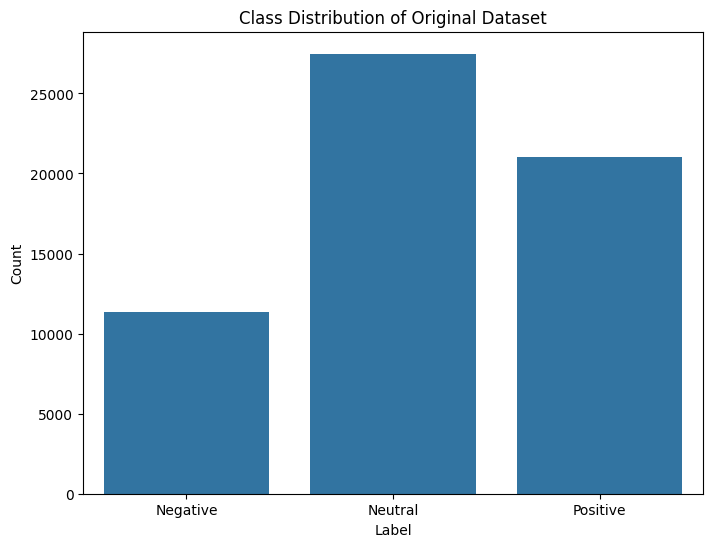

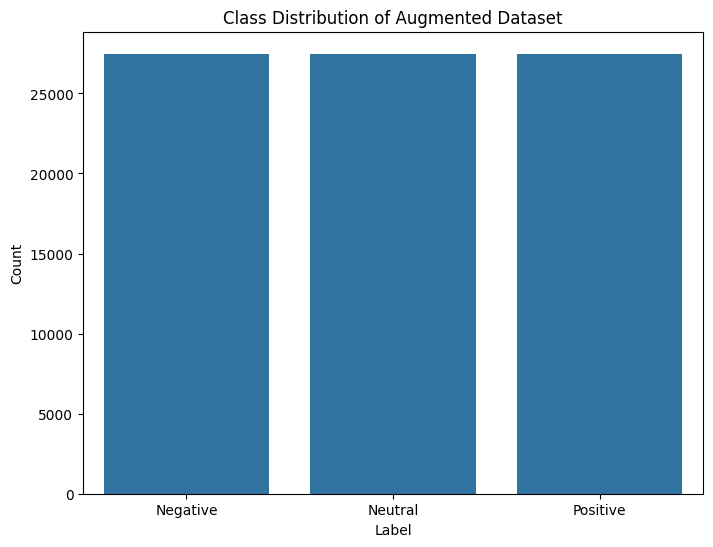

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution of the original dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=merged_df)
plt.title('Class Distribution of Original Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

# Visualize class distribution of the augmented dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=augmented_df)
plt.title('Class Distribution of Augmented Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

# Roberta Classifier


## Load Augmented Dataset

### Subtask:
Load the augmented dataset from the local path.

In [ ]:
import pandas as pd
import os

# Define the local path to the augmented dataset
augmented_dataset_path_local = "C:\\Users\\adria\\OneDrive\\Desktop\\CODING\\jupyter\\datasets\\tweeteval\\augmented_tweeteval_sentiment.csv"

# Load the augmented dataset
augmented_df = pd.read_csv(augmented_dataset_path_local)

# Display the shape of the loaded DataFrame
print(f"Shape of the loaded augmented dataset: {augmented_df.shape}")

# Display the first few rows
display(augmented_df.head())

Shape of the loaded augmented dataset: (82437, 2)


,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


## Clean and Preprocess Data

### Subtask:
Clean and preprocess the text data to remove noise and standardize the format.

**Reasoning**:
Inspect `augmented_df` for missing values, handle them by dropping rows with missing text, apply the existing `clean_text` function to create a 'cleaned_text' column, and then display the head of the updated DataFrame.

In [ ]:
import re

def clean_text(text):
    # Check if the input is a string before applying string methods
    if not isinstance(text, str):
        return "" # Return an empty string for non-string inputs (like NaN)

    # Convert to lowercase
    text = text.lower()
    # Remove mentions (@user) and URLs (http\S+)
    text = re.sub(r'(@\w+|http\S+)', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Check for missing values before cleaning
print("Missing values before cleaning:")
print(augmented_df.isnull().sum())

# Handle missing values: Drop rows where 'text' is missing as cleaning requires text
augmented_df.dropna(subset=['text'], inplace=True)

# Apply the clean_text function to the 'text' column
augmented_df['cleaned_text'] = augmented_df['text'].apply(clean_text)

# Display the first few rows of the augmented DataFrame with the new 'cleaned_text' column
display(augmented_df[['text', 'cleaned_text', 'label']].head())

# Display the shape after cleaning
print(f"Shape of the augmented DataFrame after cleaning: {augmented_df.shape}")

Missing values before cleaning:
text     13020
label        0
dtype: int64


,text,cleaned_text,label
0,"""QT @user In the original draft of the 7th boo...",qt in the original draft of the 7th book remus...,2
1,"""Ben Smith / Smith (concussion) remains out of...",ben smith smith concussion remains out of the ...,1
2,Sorry bout the stream last night I crashed out...,sorry bout the stream last night i crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,chase headleys rbi double in the 8th inning of...,1
4,@user Alciato: Bee will invest 150 million in ...,alciato bee will invest 150 million in january...,2


Shape of the augmented DataFrame after cleaning: (69417, 3)


**Reasoning**:
Load the augmented dataset from the specified local path into a pandas DataFrame and display its shape and the first few rows to verify it loaded correctly.

## Split Data

### Subtask:
Split the balanced dataset into training and testing sets, ensuring the class distribution is maintained using stratification.

**Reasoning**:
Split the balanced dataset into training and testing sets while maintaining class distribution using stratification.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = augmented_df['cleaned_text']
y = augmented_df['label']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (55533,)
Shape of X_test: (13884,)
Shape of y_train: (55533,)
Shape of y_test: (13884,)


## Tokenize Data

### Subtask:
Tokenize the text data for the RoBERTa model.

In [ ]:
from transformers import AutoTokenizer
import torch

# Load the pretrained RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

# Tokenize the training and testing sets
# Ensure padding and truncation are applied with a suitable maximum length
train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(X_test), truncation=True, padding='max_length', max_length=128, return_tensors="pt")

# Convert labels to PyTorch tensors
train_labels = torch.tensor(y_train.values)
test_labels = torch.tensor(y_test.values)

print("Tokenization complete and data converted to PyTorch tensors.")

Tokenization complete and data converted to PyTorch tensors.


## Define Dataset Class

### Subtask:
Create a custom PyTorch Dataset class to handle the tokenized data and labels.

**Reasoning**:
Define a custom PyTorch Dataset class to encapsulate the tokenized inputs and labels, making it compatible with PyTorch DataLoaders and the Hugging Face Trainer.

In [ ]:
import torch
from torch.utils.data import Dataset

class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

print("Custom Dataset class defined.")

Custom Dataset class defined.


**Reasoning**:
Import the RoBERTa tokenizer, load the pretrained tokenizer, tokenize the training and testing data with padding and truncation, and convert the tokenized outputs to PyTorch tensors.

## Load RoBERTa Model

### Subtask:
Load a pretrained RoBERTa model for sequence classification.

**Reasoning**:
Load a pretrained RoBERTa model for sequence classification and print a confirmation message.

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load a pretrained RoBERTa model for sequence classification with 3 output labels (for negative, neutral, positive)
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

print("Pretrained RoBERTa model loaded successfully.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Pretrained RoBERTa model loaded successfully.


## Implement Hyperparameter Search

### Subtask:
Implement hyperparameter search using Optuna for learning rate and number of epochs.

**Reasoning**:
Define the model initialization function, the objective function for Optuna to optimize (based on evaluation metric), create and run the Optuna study, and print the best hyperparameters found.

In [ ]:
!pip install accelerate -U

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import torch
from torch.utils.data import Dataset # Import Dataset

# Assuming train_encodings, test_encodings, train_labels, and test_labels are already created

# Define a custom PyTorch Dataset class
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Instantiate the custom Dataset for training and testing data
train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)


# Define a function to compute metrics for evaluation
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Define the model_init function for Optuna
def model_init(trial):
    # Load a pretrained RoBERTa model for sequence classification with 3 output labels
    return AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 3) # Search between 1 and 3 epochs

    # Define training arguments with suggested hyperparameters and mixed precision
    training_args = TrainingArguments(
        output_dir='./results',          # output directory for checkpoints
        num_train_epochs=num_train_epochs,              # number of training epochs from Optuna trial
        per_device_train_batch_size=8,   # batch size per device during training
        per_device_eval_batch_size=8,   # batch size per device during evaluation
        weight_decay=0.01,               # weight decay
        logging_dir='./logs',            # directory for storing logs
        logging_steps=100,               # number of update steps before logging
        eval_strategy='epoch',     # evaluate at the end of each epoch
        save_strategy='epoch',           # save at the end of each epoch
        load_best_model_at_end=True,     # load the best model based on the evaluation metric at the end of training
        metric_for_best_model='eval_f1', # metric to monitor for selecting the best model - Using F1-score
        fp16=True,                       # Enable mixed precision training
        learning_rate=learning_rate,      # Use suggested learning rate
        report_to="none" # Disable reporting to Weights & Biases
    )

    # Instantiate the Trainer object
    trainer = Trainer(
        model_init=model_init, # Use model_init for hyperparameter search
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate the model on the test set and return the metric to optimize
    eval_result = trainer.evaluate()
    return eval_result["eval_f1"] # Return the evaluation F1 score for maximization


# Create an Optuna study and optimize the objective function
# We aim to maximize the evaluation F1 score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2) # Set a reasonable number of trials

# Print the best trial's parameters
print("Best trial:")
print("  Value (Evaluation F1 Score): {}".format(study.best_trial.value))
print("  Params: ")
for key, value in study.best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-09-25 18:12:16,820] A new study created in memory with name: no-name-3b5ea5e0-5bec-4150-a0ab-887fab20a1eb
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().deta

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.641100,0.656110,0.716076,0.719590,0.716076,0.715294
2,0.528600,0.655019,0.722990,0.724724,0.722990,0.722232


C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:

[I 2025-09-25 18:40:50,482] Trial 0 finished with value: 0.7222320281599273 and parameters: {'learning_rate': 1.8873891393685228e-05, 'num_train_epochs': 2}. Best is trial 0 with value: 0.7222320281599273.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: User

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.680600,0.772711,0.682728,0.689519,0.682728,0.681379
2,0.582900,0.668917,0.712907,0.713782,0.712907,0.712380
3,0.430800,0.789812,0.713987,0.714800,0.713987,0.713565


C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:

[I 2025-09-25 19:23:13,363] Trial 1 finished with value: 0.7135651356499895 and parameters: {'learning_rate': 3.435566558123877e-05, 'num_train_epochs': 3}. Best is trial 0 with value: 0.7222320281599273.


Best trial:
  Value (Evaluation F1 Score): 0.7222320281599273
  Params: 
    learning_rate: 1.8873891393685228e-05
    num_train_epochs: 2


## Train Model with Best Hyperparameters

### Subtask:
Train the RoBERTa classifier using the best hyperparameters from Optuna.

**Reasoning**:
Retrieve the best hyperparameters from the Optuna study, define the `TrainingArguments` using these parameters, load a new instance of the RoBERTa model, create a `Trainer` instance with the best model and arguments, and start the training process.

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
import torch

# Get the best hyperparameters from the Optuna study
best_params = study.best_trial.params

# Define training arguments with the best hyperparameters
training_args = TrainingArguments(
    output_dir='./results_best_run',  # output directory for checkpoints
    num_train_epochs=5, # Use best number of epochs
    learning_rate=best_params['learning_rate'], # Use best learning rate
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=8,   # batch size per device during evaluation
    weight_decay=0.01,               # weight decay
    logging_dir='./logs_best_run',    # directory for storing logs
    logging_steps=100,               # number of update steps before logging
    eval_strategy='epoch',     # evaluate at the end of each epoch
    save_strategy='epoch',           # save at the end of each epoch
    load_best_model_at_end=True,     # load the best model based on the evaluation metric at the end of training
    metric_for_best_model='eval_f1', # metric to monitor for selecting the best model
    fp16=True,                       # Enable mixed precision training
    report_to="none" # Disable reporting to Weights & Biases
)

# Load a new instance of the RoBERTa model for training with best hyperparameters
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Instantiate the Trainer object
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics      # the callback for computing metrics
)

# Start the training process
print("Starting model training with best hyperparameters...")
trainer.train()
print("Model training complete.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting model training with best hyperparameters...


C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.663200,0.692806,0.699942,0.706407,0.699942,0.698763
2,0.572800,0.662232,0.713483,0.713556,0.713483,0.713308
3,0.467400,0.763913,0.709882,0.711249,0.709882,0.708991
4,0.423700,0.982017,0.711971,0.712591,0.711971,0.711450
5,0.311400,1.271184,0.708153,0.709258,0.708153,0.707425


C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:

Model training complete.


## Save the Fine-tuned Model

### Subtask:
Save the fine-tuned RoBERTa model and tokenizer to the specified local path.

**Reasoning**:
Define the local save path, create the directory if it doesn't exist, save the model using the `trainer.save_model()` method, save the tokenizer using the `tokenizer.save_pretrained()` method, and print a confirmation message.

In [ ]:
import os

# Define the local path to save the model
save_path_local = "C:\\Users\\adria\\OneDrive\\Desktop\\CODING\\jupyter\\models\\tweeteval\\robertaclassifier"

# Create the directory if it doesn't exist
os.makedirs(save_path_local, exist_ok=True)

# Save the model using the trainer
trainer.save_model(save_path_local)

# Save the tokenizer (assuming 'tokenizer' object is still available from tokenization step)
tokenizer.save_pretrained(save_path_local)

print(f"RoBERTa model and tokenizer saved to {save_path_local}")

RoBERTa model and tokenizer saved to C:\Users\adria\OneDrive\Desktop\CODING\jupyter\models\tweeteval\robertaclassifier


## Generate Classification Report and Confusion Matrix

### Subtask:
Generate a classification report and confusion matrix for the trained RoBERTa model on the test set.

**Reasoning**:
Use the trained `trainer` object to get predictions on the `test_dataset`, then use `sklearn.metrics.classification_report` and `sklearn.metrics.confusion_matrix` to generate and print the report and matrix.

C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\adria\AppData\Local\Temp\ipykernel_22552\3178301865.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.81      0.75      3671
     Neutral       0.73      0.69      0.71      5496
    Positive       0.75      0.69      0.72      4717

    accuracy                           0.72     13884
   macro avg       0.72      0.73      0.72     13884
weighted avg       0.72      0.72      0.72     13884



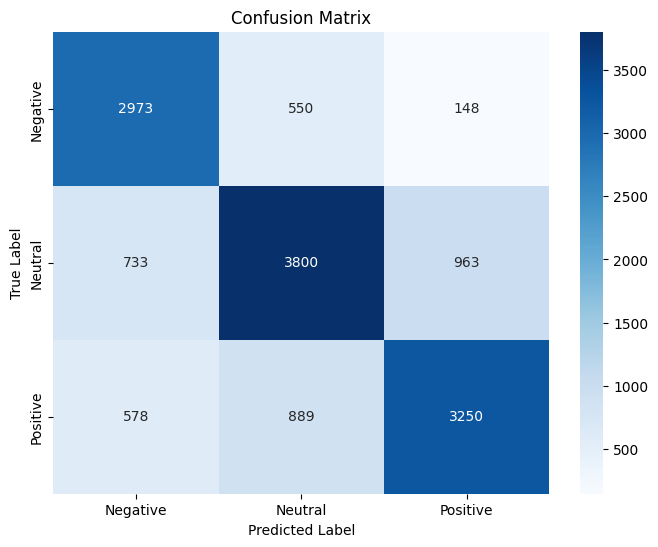

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Generate classification report
print("Classification Report:")
print(classification_report(labels, preds, target_names=['Negative', 'Neutral', 'Positive']))

# Generate confusion matrix
conf_matrix = confusion_matrix(labels, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()